# import packages

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [16]:
import pandas as pd
import scipy.stats as stats

# load dataset

Read the CSV data into a DataFrame, define -1 values as None

In [17]:
path = "../data/dft-road-casualty-statistics-casualty-provisional-mid-year-unvalidated-2022.csv"
df = pd.read_csv(path, na_values=-1)

# data exploration

In [18]:
# Shape of the dataset
shape = df.shape

# Data types of the columns
data_types = df.dtypes

# Check for missing values
missing_values = df.isnull().sum()

# Descriptive statistics of the numerical columns
descriptive_stats = df.describe()

# Count of unique values for each column
unique_counts = df.nunique()

shape, data_types, missing_values, descriptive_stats, unique_counts

((61352, 20),
 status                                 object
 accident_index                         object
 accident_year                           int64
 accident_reference                     object
 vehicle_reference                       int64
 casualty_reference                      int64
 casualty_class                          int64
 sex_of_casualty                       float64
 age_of_casualty                       float64
 age_band_of_casualty                  float64
 casualty_severity                       int64
 pedestrian_location                     int64
 pedestrian_movement                     int64
 car_passenger                         float64
 bus_or_coach_passenger                float64
 pedestrian_road_maintenance_worker    float64
 casualty_type                         float64
 casualty_home_area_type               float64
 casualty_imd_decile                   float64
 lsoa_of_casualty                       object
 dtype: object,
 status                       

Check for outliers or inconsistencies For numerical columns and boxplot

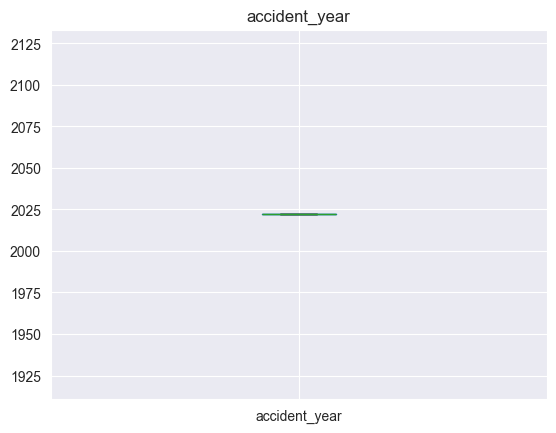

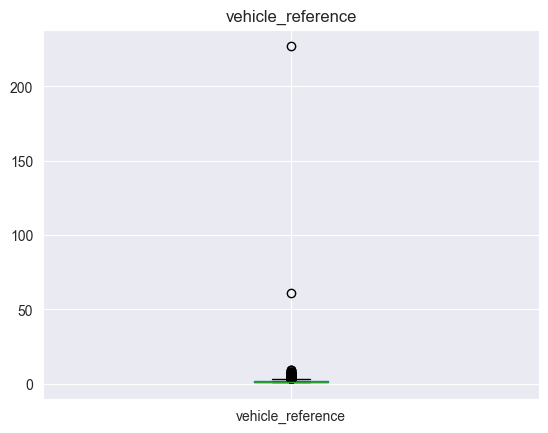

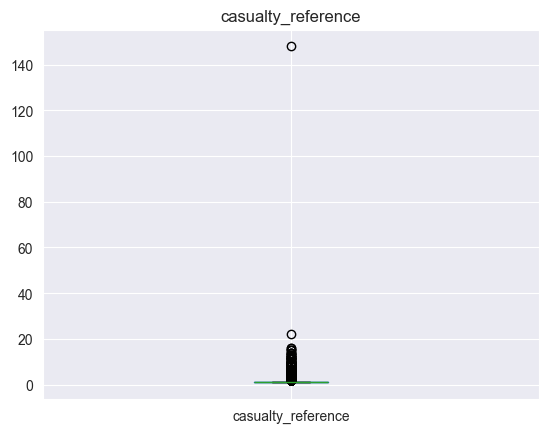

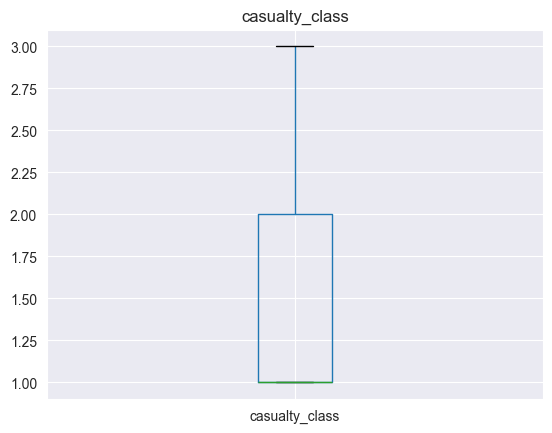

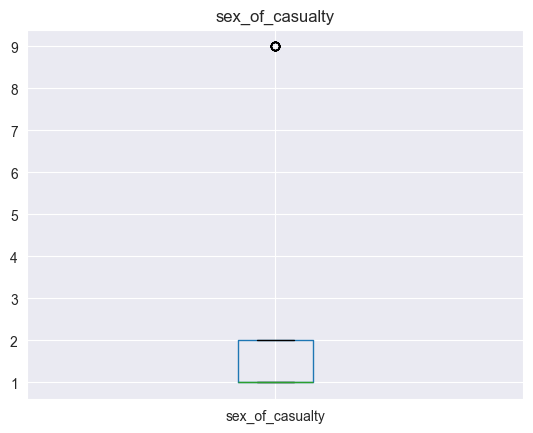

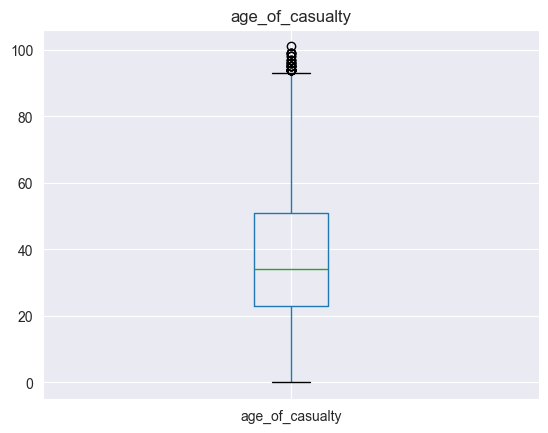

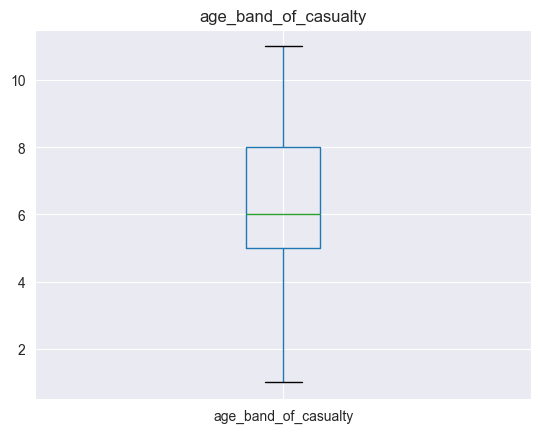

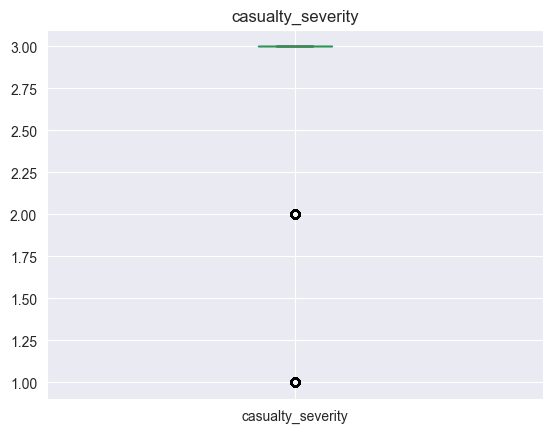

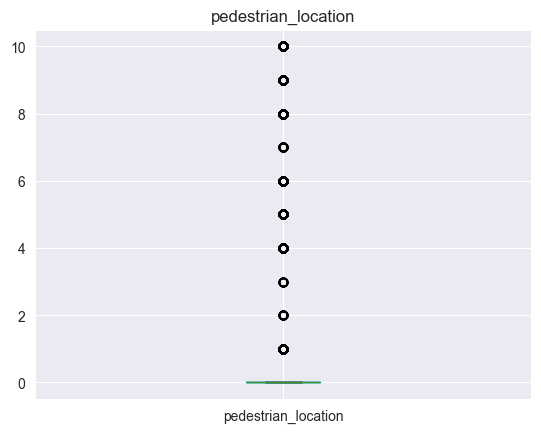

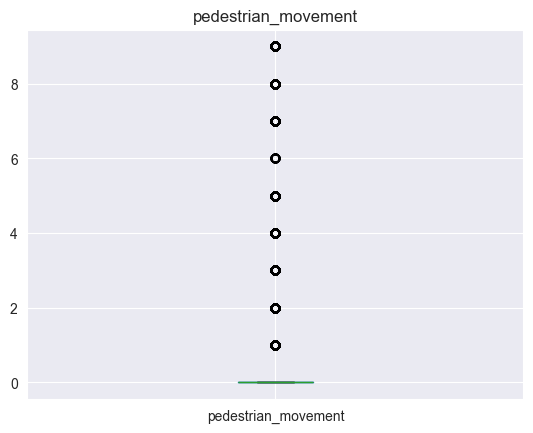

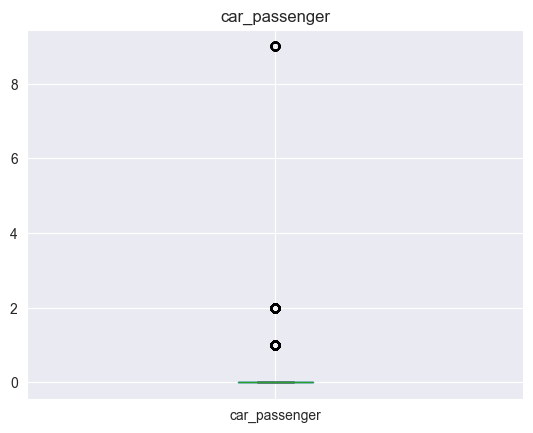

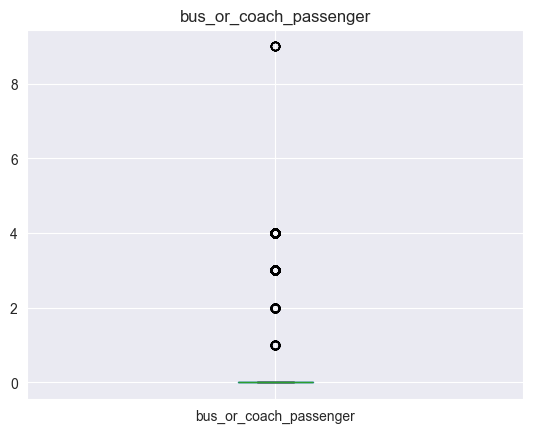

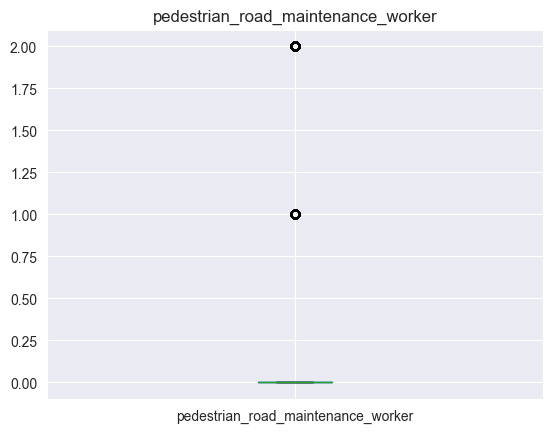

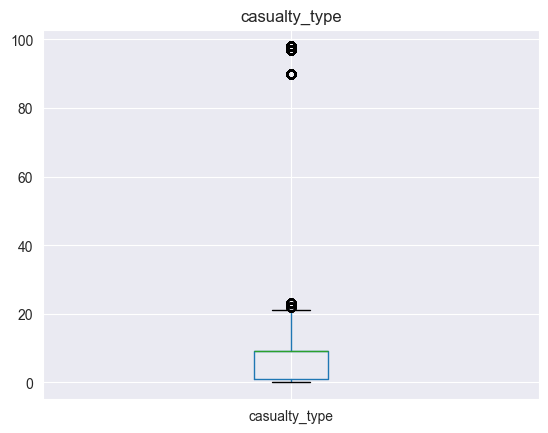

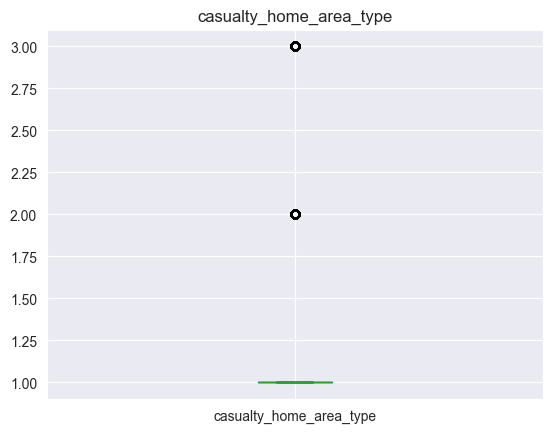

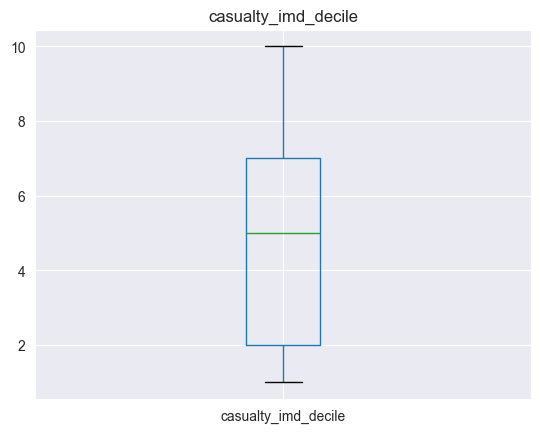

In [19]:
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
for column in numerical_columns:
    df.boxplot(column=column)
    plt.title(column)
    plt.show()    

Check for outliers or inconsistencies For categorical columns

In [20]:
categorical_columns = df.select_dtypes(include=['object']).columns
for column in categorical_columns:
    # Check unique values
    print(f"\nUnique values in {column}:")
    print(df[column].value_counts())


Unique values in status:
status
Unvalidated    61352
Name: count, dtype: int64

Unique values in accident_index:
accident_index
2022010356595    16
2022010377133    16
2022411164580    14
2022211187319    13
2022471142394    13
                 ..
2022101150789     1
2022101151215     1
2022101151304     1
2022101151620     1
2022461157316     1
Name: count, Length: 48283, dtype: int64

Unique values in accident_reference:
accident_reference
010356595    16
010377133    16
411164580    14
211187319    13
471142394    13
             ..
101150789     1
101151215     1
101151304     1
101151620     1
461157316     1
Name: count, Length: 48283, dtype: int64

Unique values in lsoa_of_casualty:
lsoa_of_casualty
E01019456    22
E01004242    17
E01005108    15
E01033583    15
E01004252    14
             ..
E01008671     1
E01025007     1
E01027489     1
E01025285     1
E01026108     1
Name: count, Length: 23840, dtype: int64


Calculate the range of diversity for each numerical column

In [21]:
diversity_ranges = {}
for column in df.columns:
    if df[column].dtype in ['int64', 'float64']:  # Check if the column is numerical
        column_range = df[column].max() - df[column].min()
        diversity_ranges[column] = column_range + 1

# Print the range of diversity for each numerical column
for column, diversity_range in diversity_ranges.items():
    print(f"Range of diversity for '{column}': {diversity_range}")

Range of diversity for 'accident_year': 1
Range of diversity for 'vehicle_reference': 227
Range of diversity for 'casualty_reference': 148
Range of diversity for 'casualty_class': 3
Range of diversity for 'sex_of_casualty': 9.0
Range of diversity for 'age_of_casualty': 102.0
Range of diversity for 'age_band_of_casualty': 11.0
Range of diversity for 'casualty_severity': 3
Range of diversity for 'pedestrian_location': 11
Range of diversity for 'pedestrian_movement': 10
Range of diversity for 'car_passenger': 10.0
Range of diversity for 'bus_or_coach_passenger': 10.0
Range of diversity for 'pedestrian_road_maintenance_worker': 3.0
Range of diversity for 'casualty_type': 99.0
Range of diversity for 'casualty_home_area_type': 3.0
Range of diversity for 'casualty_imd_decile': 10.0


# Data Cleaning

In [22]:
df.drop(columns=['accident_year', 'accident_reference', 'status'], inplace=True)
df.drop_duplicates(inplace=True)

Handle missing data

In [23]:
from sklearn.impute import SimpleImputer

# Impute missing values with mode
imputer_mode = SimpleImputer(strategy='most_frequent')

# Fit the imputer and transform the data
df['sex_of_casualty'] = imputer_mode.fit_transform(df[['sex_of_casualty']])
df['casualty_type'] = imputer_mode.fit_transform(df[['casualty_type']])
df['car_passenger'] = imputer_mode.fit_transform(df[['car_passenger']])
df['bus_or_coach_passenger'] = imputer_mode.fit_transform(
    df[['bus_or_coach_passenger']])
df['pedestrian_road_maintenance_worker'] = imputer_mode.fit_transform(
    df[['pedestrian_road_maintenance_worker']])

# Impute missing values with median
imputer_median = SimpleImputer(strategy='median')

df['age_of_casualty'] = imputer_median.fit_transform(df[['age_of_casualty']])
df['age_band_of_casualty'] = imputer_median.fit_transform(
    df[['age_band_of_casualty']])
df.dropna(inplace=True)

# Data Type Conversion

In [25]:
columns_to_convert = ['sex_of_casualty', 'age_of_casualty',
                      'age_band_of_casualty',
                      'car_passenger', 'bus_or_coach_passenger',
                      'pedestrian_road_maintenance_worker', 'casualty_type',
                      'casualty_home_area_type', 'casualty_imd_decile']

# Convert columns to int type
df[columns_to_convert] = df[columns_to_convert].astype(int)

# Descriptive Statistics

Summary statistics for numerical variables

In [26]:
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
numerical_summary = df[numerical_columns].describe()
print("Summary statistics for numerical variables:")
print(numerical_summary)

Summary statistics for numerical variables:
       vehicle_reference  casualty_reference  casualty_class  \
count       53325.000000        53325.000000    53325.000000   
mean            1.451833            1.318425        1.459747   
std             1.167580            0.990098        0.727768   
min             1.000000            1.000000        1.000000   
25%             1.000000            1.000000        1.000000   
50%             1.000000            1.000000        1.000000   
75%             2.000000            1.000000        2.000000   
max           227.000000          148.000000        3.000000   

       casualty_severity  pedestrian_location  pedestrian_movement  
count       53325.000000         53325.000000         53325.000000  
mean            2.791074             0.773221             0.630398  
std             0.432993             2.167904             1.995919  
min             1.000000             0.000000             0.000000  
25%             3.000000          

Frequency tables for categorical variables

In [27]:
categorical_columns = df.select_dtypes(include=['object']).columns
for column in categorical_columns:
    print(f"\nFrequency table for {column}:")
    print(df[column].value_counts())


Frequency table for accident_index:
accident_index
2022010377133    16
2022471142394    13
2022411164580    12
2022211187319    11
2022540500822    10
                 ..
2022201190158     1
2022201191103     1
2022201191139     1
2022201191477     1
2022461157316     1
Name: count, Length: 42801, dtype: int64

Frequency table for lsoa_of_casualty:
lsoa_of_casualty
E01019456    22
E01004242    17
E01005108    15
E01033583    15
E01004252    14
             ..
E01008671     1
E01025007     1
E01027489     1
E01025285     1
E01026108     1
Name: count, Length: 23840, dtype: int64


# Exploratory Data Analysis (EDA)

Compare the distribution of casualty severity across different demographic groups

1. Gender vs. Casualty Severity

In [0]:
sns.countplot(x='sex_of_casualty', hue='casualty_severity', data=df)
plt.title('Casualty Severity by Gender')
plt.show()

2. Age Band vs. Casualty Severity

In [0]:
sns.countplot(x='age_band_of_casualty', hue='casualty_severity', data=df, order=sorted(df['age_band_of_casualty'].unique()))
plt.title('Casualty Severity by Age Band')
plt.xticks(rotation=45)
plt.show()